   # Image Classification and                                Face Recognition

## Image Classification

### Edge Detection

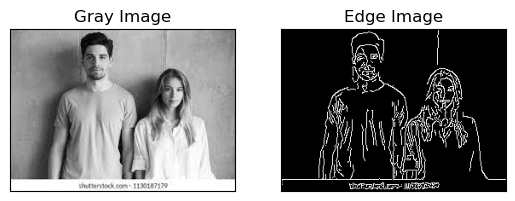

In [41]:
#Edge Detection using Canny
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('1.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Basic Morphological Image Processing with Thresholding

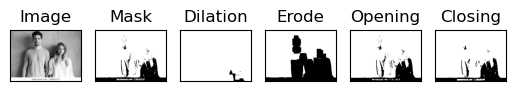

In [43]:
import numpy as np
img = cv2.imread("1.jpg",cv2.IMREAD_GRAYSCALE)
_,masking=cv2.threshold(img,220,225,cv2.THRESH_BINARY_INV)
kernel = np.ones((2,2),np.uint8)
dilations=cv2.dilate(masking,kernel,iterations=15)
erode=cv2.erode(masking,kernel,iterations=15)
openings=cv2.morphologyEx(masking,cv2.MORPH_OPEN,kernel)
closing=cv2.morphologyEx(masking,cv2.MORPH_CLOSE,kernel)

title=["Image","Mask","Dilation","Erode","Opening","Closing"]
images=[img,masking,dilations,erode,openings,closing]
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Face Recognition

### Haar Cascades

In [40]:
import cv2

# Load the pre-trained cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image = cv2.imread('1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the output image
cv2.imshow('Face Detection using Haar Cascades', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Deeplearning

In [44]:
import cv2

# Load the pre-trained face detection model
prototxt_path = "deploy.prototxt.txt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Load an image
image = cv2.imread('1.jpg')

# Resize the image for faster processing
resized_image = cv2.resize(image, (300, 300))

# Create a blob from the image
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the network
net.setInput(blob)

# Perform face detection
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    if confidence > 0.5:
        # Compute the coordinates of the bounding box for the face
        box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
        (startX, startY, endX, endY) = box.astype('int')

        # Draw the bounding box around the face
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

# Display the output image
cv2.imshow('Face Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### ResNet SSD

In [36]:
import cv2

# Load the pre-trained face detection model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

# Load an image
image = cv2.imread('1.jpg')

# Resize the image for faster processing
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the network
net.setInput(blob)

# Perform face detection
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    if confidence > 0.5:
        # Compute the coordinates of the bounding box for the face
        box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
        (startX, startY, endX, endY) = box.astype('int')

        # Draw the bounding box around the face
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

# Display the output image
cv2.imshow('Face Detection using ResNet SSD', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Comparision between Haar,Deeplearning and ResNet

In [29]:
import cv2

# Function to perform face detection using Haar Cascades
def detect_faces_haar(image):
    # Load the pre-trained cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces with blue color
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, 'Haar', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

# Function to perform face detection using OpenCV deep learning-based face detector
def detect_faces_opencv_dnn(image):
    # Load the pre-trained face detection model
    prototxt_path = "deploy.prototxt.txt"
    model_path = "res10_300x300_ssd_iter_140000.caffemodel"
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

    # Resize the image for faster processing
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the input to the network
    net.setInput(blob)

    # Perform face detection
    detections = net.forward()

    # Loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
            (startX, startY, endX, endY) = box.astype('int')

            # Draw the bounding box around the face using green color
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(image, 'Deep Learning', (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Function to perform face detection using ResNet SSD
def detect_faces_resnet_ssd(image):
    # Load the pre-trained face detection model
    net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

    # Resize the image for faster processing
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the input to the network
    net.setInput(blob)

    # Perform face detection
    detections = net.forward()

    # Loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
            (startX, startY, endX, endY) = box.astype('int')

            # Draw the bounding box around the face using red color
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
            cv2.putText(image, 'ResNet', (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    return image

# Load an image
image = cv2.imread('img.jpg')

# Perform face detection using different techniques
image_haar = detect_faces_haar(image.copy())
image_opencv_dnn = detect_faces_opencv_dnn(image.copy())
image_resnet_ssd = detect_faces_resnet_ssd(image.copy())

# Concatenate the results horizontally for visualization
result = cv2.hconcat([image_haar, image_opencv_dnn, image_resnet_ssd])

# Display the output image
cv2.imshow('Face Detection Comparison', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Face Recognition in Video

In [32]:
import cv2

# Function to perform face detection using Haar Cascades
def detect_faces_haar(image):
    # Load the pre-trained cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces with blue color
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Add label for Haar Cascades
    cv2.putText(image, 'Haar Cascades', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

    return image

# Function to perform face detection using OpenCV deep learning-based face detector
def detect_faces_opencv_dnn(image):
    # Load the pre-trained face detection model
    prototxt_path = "deploy.prototxt.txt"
    model_path = "res10_300x300_ssd_iter_140000.caffemodel"
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

    # Resize the image for faster processing
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the input to the network
    net.setInput(blob)

    # Perform face detection
    detections = net.forward()

    # Loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
            (startX, startY, endX, endY) = box.astype('int')

            # Draw the bounding box around the face using green color
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    # Add label for OpenCV deep learning-based face detector
    cv2.putText(image, 'OpenCV DNN', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    return image

# Function to perform face detection using ResNet SSD
def detect_faces_resnet_ssd(image):
    # Load the pre-trained face detection model
    net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

    # Resize the image for faster processing
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the input to the network
    net.setInput(blob)

    # Perform face detection
    detections = net.forward()

    # Loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]
            (startX, startY, endX, endY) = box.astype('int')

            # Draw the bounding box around the face using red color
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    
    # Add label for ResNet SSD
    cv2.putText(image, 'ResNet SSD', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)

    return image

# Open the video capture
cap = cv2.VideoCapture('sample1.mp4')

# Check if the video capture is opened successfully
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Define the desired width and height for the video frame
width = 320
height = 240

# Loop through the video frames
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame is read successfully
    if not ret:
        break

    # Resize the frame to the desired width and height
    frame = cv2.resize(frame, (width, height))

    # Perform face detection using different techniques
    frame_haar = detect_faces_haar(frame.copy())
    frame_opencv_dnn = detect_faces_opencv_dnn(frame.copy())
    frame_resnet_ssd = detect_faces_resnet_ssd(frame.copy())

    # Concatenate the frames horizontally
    result = cv2.hconcat([frame_haar, frame_opencv_dnn, frame_resnet_ssd])

    # Display the output frame
    cv2.imshow('Face Detection Comparison', result)

    # Check for 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()
